In [9]:
import json
import datetime
from matplotlib import pyplot as plt

In [2]:
with open('/home/michel/projects/desinfo/political-ads-scraper/data/graph_nb_ads_facebook.json', 'r') as f:
    graph_data = json.load(f)

In [4]:
data_FR = graph_data['FR']
data_FR

{'API': {'2019-05-16': 12934,
  '2019-05-20': 13550,
  '2019-05-27': 9277,
  '2019-05-31': 9642,
  '2019-06-01': 9803,
  '2019-06-02': 9867,
  '2019-06-03': 9925,
  '2019-06-04': 10023,
  '2019-06-05': 10054,
  '2019-06-06': 10216,
  '2019-06-07': 10399},
 'report': {'2019-05-10': 0,
  '2019-05-11': 0,
  '2019-05-12': 0,
  '2019-05-13': 0,
  '2019-05-14': 1405,
  '2019-05-15': 4953,
  '2019-05-16': 11165,
  '2019-05-17': 11577,
  '2019-05-18': 11791,
  '2019-05-19': 11805,
  '2019-05-20': 12069,
  '2019-05-21': 12263,
  '2019-05-22': 12487,
  '2019-05-23': 12675,
  '2019-05-24': 12888,
  '2019-05-25': 10880,
  '2019-05-26': 15507,
  '2019-05-27': 15681,
  '2019-05-28': 15502,
  '2019-05-29': 15908,
  '2019-05-30': 16080,
  '2019-05-31': 16164,
  '2019-06-01': 14091,
  '2019-06-02': 6145,
  '2019-06-03': 6260,
  '2019-06-05': 6252,
  '2019-06-06': 6383,
  '2019-06-07': 0}}

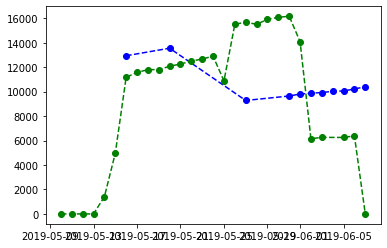

In [16]:

time_series = data_FR['API']
dates = [
    datetime.date(*map(int, date_str.split('-')))
    for date_str, nb_ads in time_series.items()
]
values = list(time_series.values())


plt.plot(dates, values, color='blue', marker='o', linestyle='dashed')


time_series = data_FR['report']
dates = [
    datetime.date(*map(int, date_str.split('-')))
    for date_str, nb_ads in time_series.items()
]
values = list(time_series.values())


plt.plot(dates, values, color='green', marker='o', linestyle='dashed')
